In [31]:
import os, re, math
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

exp_name = '750s_multi_merge'
checkpoint = '50'
AGENT = 'PPO'
results_list = os.listdir('/headless/ray_results/' + exp_name)

In [15]:
results = {}
for result_path in results_list:
    EXP = result_path
    index = [(i.start(), i.end())for i in re.finditer('_', EXP)]
    EXP = EXP[index[1][1]:index[-3][0]]
    result_path = '/headless/ray_results/' + exp_name \
        + '/' + result_path + '/progress.csv'
    df = pandas.read_csv(result_path)
    results[EXP] = {'rew_mean': df.episode_reward_mean.values}

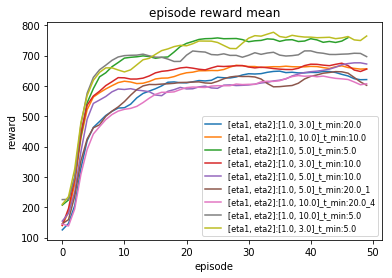

In [39]:
for i, item in enumerate(results.items()):
    key, value = item
    rew = results[key]['rew_mean']
    plt.plot(rew, label=key)
title = "episode reward mean"
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('episode reward mean')
plt.legend(prop={'size':8})

save_dir = '../result/MultiMerge/' + AGENT + '/' + exp_name
save_path = save_dir + '/episode_reward_mean.png'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(save_path)